<a href="https://colab.research.google.com/github/Suvarnaph/hello-world/blob/master/SimpleImageClassification_TransferLearning_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Load VGG16
from keras.applications.vgg16 import VGG16
model = VGG16()
print(model.summary())

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
bloc

In [2]:
# load an image from file and resize it
from keras.preprocessing.image import load_img
from google.colab import drive
drive.mount('/content/drive/')


project_path = "/content/drive/My Drive/AIMLTransferLearning/"
image = load_img(project_path+'Coffee_Mug.png', target_size=(224, 224))

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


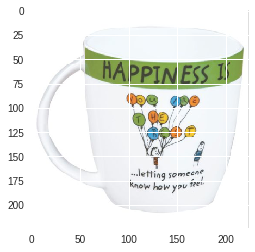

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(image)
plt.show()

In [0]:
# convert the image pixels to a numpy array
from keras.preprocessing.image import img_to_array
image = img_to_array(image)

In [5]:
image.shape

(224, 224, 3)

In [0]:
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [7]:
image.shape

(1, 224, 224, 3)

In [0]:
from keras.applications.vgg16 import preprocess_input
# prepare the image for the VGG model
image = preprocess_input(image)

In [9]:
image.shape

(1, 224, 224, 3)

In [0]:
# predict the probability across all output classes
yhat = model.predict(image)

In [11]:
from keras.applications.vgg16 import decode_predictions
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

coffee_mug (60.56%)
